# Leis dos Grandes Números

A LGN é um teorema fundamental da teoria da probabilidade, e descreve o resultado da realização da mesma experiência repetidas vezes. De acordo com a LGN, a média aritmética destes múltiplos resultados tende a se aproximar do valor esperado à medida que mais tentativas se sucederem. Ou seja, quanto mais tentativas são realizadas, mais a probabilidade da média aritmética dos resultados observados irá se aproximar da probabilidade real.

## Cálculo das probabilidades com uma MOEDA

Num jogo de cara ou coroa, qual a probabilidade de a moeda cair do lado cara? 

O cálculo é : o número de resultados esperados (1) dividido pelo número de resultados possíveis (2, cara e coroa). 

Ou seja, a probabilidade é de 1/2, nesse caso, podemos dizer ainda que a probabilidade é de "um para dois", ou que temos "50% de chance".   


In [1]:
import numpy as np
import pandas as pd

In [2]:
lista_lancamentos = []

for lancamentos in [10, 20, 30, 50, 100, 1000, 10000, 100000]: #lista de lançamentos
    
    for numero_lancamentos in range(lancamentos):
        if np.random.randint(low=0, high=2) == 1:
            lista_lancamentos.append(1)
        else:
            lista_lancamentos.append(0)
        
    df_media = pd.DataFrame(lista_lancamentos, columns = ['moeda'])  
    media_calculada = df_media.moeda.mean()
    
    print(f'Media com {lancamentos} moedas: {round(media_calculada,6)}')

Media com 10 moedas: 0.3
Media com 20 moedas: 0.333333
Media com 30 moedas: 0.35
Media com 50 moedas: 0.418182
Media com 100 moedas: 0.442857
Media com 1000 moedas: 0.515702
Media com 10000 moedas: 0.506512
Media com 100000 moedas: 0.501412


In [3]:
df = pd.DataFrame(lista_lancamentos, columns = ['moeda']) #criando um dataframe para analisarmos os resultados

In [4]:
df.shape #quantidade de lançamentos - soma da lista de lançamentos

(111210, 1)

In [5]:
df['moeda'].value_counts(3) #quantidade de vezes que saiu cada lado da moeda

1    0.501412
0    0.498588
Name: moeda, dtype: float64

In [6]:
df['moeda'].value_counts()/lancamentos #em percentual

1    0.55762
0    0.55448
Name: moeda, dtype: float64

## Cálculo das probabilidades com um DADO

### Probabilidade de sair o número 1

In [10]:
#probabilidade sair o número 1
lista_lancamentos = []

for lancamentos in [10, 20, 1000, 10000, 500000]:
    
    for numero_lancamentos in range(lancamentos):
        if np.random.randint(low=1, high=7) == 1:
            lista_lancamentos.append(1)
        else:
            lista_lancamentos.append(0)
        
        
    df_media = pd.DataFrame(lista_lancamentos, columns = ['dados'])    
    media_calculada = df_media.dados.mean()
    
    print(f'Media com {lancamentos} dados: {round(media_calculada,6)}')

Media com 10 dados: 0.2
Media com 20 dados: 0.3
Media com 1000 dados: 0.190291
Media com 10000 dados: 0.170807
Media com 500000 dados: 0.167


In [11]:
1/6 #probabilidade de sair um dos lados

0.16666666666666666

In [12]:
df = pd.DataFrame(lista_lancamentos, columns = ['dados']) #criando um dataframe para analisarmos os resultados

In [13]:
df['dados'].value_counts()/100 #quantas vezes saiu o número 1 - o 0 representa as outras faces de 2 à 6

0    4256.88
1     853.42
Name: dados, dtype: float64

In [16]:
df.sum()/df.shape[0] #probabilidade

dados    0.167
dtype: float64

### Probabilidade de sair o número 6 mais de uma vez em 3 dados 

Wall time: 46.9 ms


C:\Users\Marcos\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


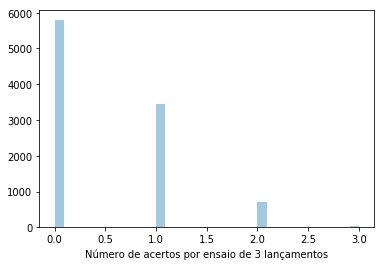

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# definimos a quantidade de ensaios.


quantidade_ensaios = 10000

# definimos a quantidade de lançamentos por ensaio.
lançamentos = 3

# definimos a probabilidade de obter cada em cada lançamento.
probabilidade_sucesso = 1/6

# binomial retorna o número de sucessos de cada vez que se realizou um ensaio de 8 lançamentos.
%time samples_binomial = np.random.binomial(n = lançamentos, p = probabilidade_sucesso, size = quantidade_ensaios)

# construímos um gráfico.
eixo_x = 'Número de acertos por ensaio de 3 lançamentos'
sns.distplot(samples_binomial, axlabel = eixo_x, kde = False);

In [ ]:
# Lançando 3 dados por 1000 vezes: Probabilidade de se obter nenhum, um, dois e três dados com número seis (com 1/6 de probabilidade) 
pd.value_counts(samples_binomial)

In [ ]:
len(samples_binomial)

In [26]:
print("Lançando 3 dados por 1000 vezes:")

print("Probabilidade de se obter nenhum dado com o número 6:",pd.value_counts(samples_binomial)[0]/len(samples_binomial))
print("Probabilidade de se obter 1 dado com o número 6:",pd.value_counts(samples_binomial)[1]/len(samples_binomial))
print("Probabilidade de se obter 2 dados com o número 6:",pd.value_counts(samples_binomial)[2]/len(samples_binomial))
print("Probabilidade de se obter 3 dados como número 6:",pd.value_counts(samples_binomial)[3]/len(samples_binomial))
simulator = (pd.value_counts(samples_binomial)[2] + pd.value_counts(samples_binomial)[3])/len(samples_binomial)
print("Probabilidade de se obter pelos menos 2 dados com o número 6:", simulator)

Lançando 3 dados por 1000 vezes:
Probabilidade de se obter nenhum dado com o número 6: 0.5789
Probabilidade de se obter 1 dado com o número 6: 0.346
Probabilidade de se obter 2 dados com o número 6: 0.0709
Probabilidade de se obter 3 dados como número 6: 0.0042
Probabilidade de se obter pelos menos 2 dados com o número 6: 0.0751
